## CA 1, LLMs Spring 2025

- **Name: OMID Moradi**
- **Student ID**

---
#### Your submission should be named using the following format: `CA1_LASTNAME_STUDENTID.ipynb`.

---

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says ```Your Answer Here``` with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TAs via email: vahyd@live.com / amirh.bonakdar@ut.ac.ir

In [1]:
!pip install transformers peft datasets accelerate scipy bitsandbytes wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Q0: Setting Up

Create a Huggingface Access Token From:
https://huggingface.co/settings/tokens

You need to request for access to:
- ```meta-llama/Llama-3.2-1B```
- ```meta-llama/Llama-3.2-1B-Instruct```
- ```mistralai/Mistral-7B-v0.1```

In [ ]:
!huggingface-cli login --token {''}

In [ ]:
from huggingface_hub import whoami

print(whoami())

In [3]:
import torch
import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import LoraConfig, TaskType, get_peft_model, PeftModel, PrefixTuningConfig, PromptTuningConfig
import os
import numpy as np

In [4]:
BASE_MODEL = 'meta-llama/Llama-3.2-1B'
INSTRUCT_MODEL = 'meta-llama/Llama-3.2-1B-Instruct'

In [5]:
DEVICE = "cpu"
if torch.backends.mps.is_available():
    DEVICE = "mps"
elif torch.cuda.is_available():
    DEVICE = "cuda"

print(f"Using device: {DEVICE}")

Using device: cuda


## Getting Started with LLMs

## Q1: First Steps (25 pts)

The outputs of tokenizer are not human readable.

In [ ]:
model_id = INSTRUCT_MODEL

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map=DEVICE,
)
tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [ ]:
prompt = "What is 2 plus 2?"

inputs = tokenizer(prompt, return_tensors="pt").to(DEVICE)

outputs = model.generate(
    input_ids=inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
)

outputs

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


tensor([[128000,   3923,    374,    220,     17,   5636,    220,     17,     30,
            220,     19,    627,    791,   4320,    374,    220,     19,     13,
           1115,    374,    264,   4382,   3187,    315,   6913,  35884,    382,
            791,   7434]], device='cuda:0')

#### Q1.1: Readable Model Generation (1 pts)

a. As you see the model outputs token ids which are not readable to us. We should decode this to human readable language. Using the ```decode``` function on the tokenizer, print the human readable model generation.

In [ ]:
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)


What is 2 plus 2? 4.
The answer is 4. This is a simple example of basic arithmetic.

The concept


b. The input prompt is still a part of the output, but we only want to see the model generation. Fix this problem.

In [ ]:
input_length = len(inputs["input_ids"][0])
generated_text = tokenizer.decode(outputs[0][input_length:], skip_special_tokens=True)

print(generated_text)

 4.
The answer is 4. This is a simple example of basic arithmetic.

The concept


#### Q1.2: Generation Function (1 pts)

a. Write and test a function that takes the model, generation config as kwargs with default values, tokenizer and prompt as input and outputs the model generation (generation only). You will be using this in the next sections quite a lot.

In [ ]:
print(model.generation_config)

GenerationConfig {
  "bos_token_id": 128000,
  "do_sample": true,
  "eos_token_id": [
    128001,
    128008,
    128009
  ],
  "temperature": 0.6,
  "top_p": 0.9
}



In [ ]:
def generate_response(model, tokenizer, prompt, **generation_kwargs):

  gen_config = model.generation_config
  default_generation_kwargs = {
        "do_sample": gen_config.do_sample,
        "top_p": gen_config.top_p,
        "temperature": gen_config.temperature
}

  generation_kwargs = {**default_generation_kwargs, **generation_kwargs}

  inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

  outputs = model.generate(
      input_ids=inputs["input_ids"],
      attention_mask=inputs["attention_mask"],
      **generation_kwargs
  )
  input_length = len(inputs["input_ids"][0])
  generated_text = tokenizer.decode(outputs[0][input_length:], skip_special_tokens=True)


  return generated_text

## test
# tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForCausalLM.from_pretrained(model_id).to("cuda" if torch.cuda.is_available() else "cpu")
# tokenizer.pad_token = tokenizer.eos_token

# test_prompt = "What is ping-pong?"
# response = generate_response(model, tokenizer, test_prompt, temperature=0.7, max_length=200)

# print(response)

#### Q1.3: Comparing different Tokenizers (3 pts)

a. Bring in the tokenizer for:

- ```meta-llama/Llama-3.2-1B```
- ```mistralai/Mistral-7B-v0.1```
- ```microsoft/Phi-4-mini-instruct```.

Tokenize a PERSIAN sentence with at least 10 words using the tokenizers of all three models from different families and print the human readable output.

In [ ]:
tokenizer_Llama = AutoTokenizer.from_pretrained('meta-llama/Llama-3.2-1B')
tokenizer_mistral = AutoTokenizer.from_pretrained('mistralai/Mistral-7B-v0.1')
tokenizer_phi = AutoTokenizer.from_pretrained('microsoft/Phi-4-mini-instruct')

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.93k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.91M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

In [ ]:
tokenizer_Llama.pad_token = tokenizer_Llama.eos_token
tokenizer_mistral.pad_token = tokenizer_mistral.eos_token
tokenizer_phi.pad_token = tokenizer_phi.eos_token

In [ ]:
sentence = "بسیار سـفر باید تا پخته شود خـامی، صوفی نشـــود صافی تا در نکشد جامی"
print(f"Original Sentence:\n{sentence}\n")

tokens_llama = tokenizer_Llama.tokenize(sentence)
ids_llama = tokenizer_Llama(sentence, return_tensors="pt")["input_ids"][0]
decoded_llama = tokenizer_Llama.decode(ids_llama, skip_special_tokens=True)

print("Tokens from LLaMA Tokenizer:")
print(tokens_llama)
print("Decoded Output:")
print(decoded_llama)
print("Explanation: Since LLaMA is trained primarily on English and uses a byte-level tokenizer, it breaks Persian words into unreadable byte-like tokens.\n")

tokens_mistral = tokenizer_mistral.tokenize(sentence)
ids_mistral = tokenizer_mistral(sentence, return_tensors="pt")["input_ids"][0]
decoded_mistral = tokenizer_mistral.decode(ids_mistral, skip_special_tokens=True)

print("Tokens from Mistral Tokenizer:")
print(tokens_mistral)
print("Decoded Output:")
print(decoded_mistral)
print("Explanation: Although Mistral is not trained on Persian, its SentencePiece tokenizer splits Persian text into readable individual characters or subwords.\n")

tokens_phi = tokenizer_phi.tokenize(sentence)
ids_phi = tokenizer_phi(sentence, return_tensors="pt")["input_ids"][0]
decoded_phi = tokenizer_phi.decode(ids_phi, skip_special_tokens=True)

print("Tokens from Phi Tokenizer:")
print(tokens_phi)
print("Decoded Output:")
print(decoded_phi)
print("Explanation: The Phi model lacks Persian support and uses low-level encoding, resulting in unreadable byte-style token outputs for Persian text.\n")

Original Sentence:
بسیار سـفر باید تا پخته شود خـامی، صوفی نشـــود صافی تا در نکشد جامی

Tokens from LLaMA Tokenizer:
['Ø¨', 'Ø³ÛĮ', 'Ø§Ø±', 'ĠØ³', 'ÙĢ', 'ÙģØ±', 'ĠØ¨Ø§ÛĮØ¯', 'ĠØªØ§', 'ĠÙ¾', 'Ø®ØªÙĩ', 'ĠØ´ÙĪØ¯', 'ĠØ®', 'ÙĢ', 'Ø§ÙħÛĮ', 'ØĮ', 'ĠØµ', 'ÙĪÙģ', 'ÛĮ', 'ĠÙĨØ´', 'ÙĢÙĢÙĢ', 'ÙĪØ¯', 'ĠØµ', 'Ø§ÙģÛĮ', 'ĠØªØ§', 'ĠØ¯Ø±', 'ĠÙĨÚ©', 'Ø´Ø¯', 'ĠØ¬Ø§Ùħ', 'ÛĮ']
Decoded Output:
بسیار سـفر باید تا پخته شود خـامی، صوفی نشـــود صافی تا در نکشد جامی
Explanation: Since LLaMA is trained primarily on English and uses a byte-level tokenizer, it breaks Persian words into unreadable byte-like tokens.

Tokens from Mistral Tokenizer:
['▁', 'ب', 'س', 'ی', 'ا', 'ر', '▁', 'س', 'ـ', 'ف', 'ر', '▁', 'ب', 'ا', 'ی', 'د', '▁', 'ت', 'ا', '▁', 'پ', 'خ', 'ت', 'ه', '▁', 'ش', 'و', 'د', '▁', 'خ', 'ـ', 'ا', 'م', 'ی', '،', '▁', 'ص', 'و', 'ف', 'ی', '▁', 'ن', 'ش', 'ـ', 'ـ', 'ـ', 'و', 'د', '▁', 'ص', 'ا', 'ف', 'ی', '▁', 'ت', 'ا', '▁', 'د', 'ر', '▁', 'ن', 'ک', 'ش', 'د', '▁', 'ج', 'ا', 'م', 'ی']
Decoded Output:
بسیار سـفر باید

b. Compare the outputs, Which one produces better tokens? What is the reason for this difference in tokenization?

LLaMA Tokenizer

🔹 Since LLaMA is trained primarily on English and uses a byte-level tokenizer, it breaks Persian words into unreadable byte-like tokens.

🔹 Mistral Tokenizer

Although Mistral is not trained on Persian, its SentencePiece tokenizer splits Persian text into readable individual characters or subwords.

🔹 Phi Tokenizer

The Phi model lacks Persian support and uses low-level encoding, resulting in unreadable byte-style token outputs for Persian text.

#### Q1.4: Base Model vs. Instruction-tuned Model (10 pts)

a. See the difference between Base and Instruct Models using the prompt ```What is 2+2?```, Keep in mind that when temperature != 0, you will get different answers. Generate the answers a few time to get a sense of how models work.

***NOTE:*** It is recommended to play with various prompts and generation configs.

In [ ]:
BASE_MODEL = 'meta-llama/Llama-3.2-1B'
INSTRUCT_MODEL = 'meta-llama/Llama-3.2-1B-Instruct'

BASE_MODEL_tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
B_model = AutoModelForCausalLM.from_pretrained(BASE_MODEL).to("cuda" if torch.cuda.is_available() else "cpu")
BASE_MODEL_tokenizer.pad_token = BASE_MODEL_tokenizer.eos_token

test_prompt = "What is 2+2?"

print("=== Base Model (Llama-3.2-1B) Answers ===")
for i in range(3):
    print(f"Attempt {i+1}: {generate_response(B_model, BASE_MODEL_tokenizer, test_prompt, temperature=0.7, max_length=200)}")

INSTRUCT_MODEL_tokenizer = AutoTokenizer.from_pretrained(INSTRUCT_MODEL)
I_model = AutoModelForCausalLM.from_pretrained(INSTRUCT_MODEL).to("cuda" if torch.cuda.is_available() else "cpu")
INSTRUCT_MODEL_tokenizer.pad_token = INSTRUCT_MODEL_tokenizer.eos_token

test_prompt = "What is 2+2?"

print("\n=== Instruction-Tuned Model (Llama-3.2-1B-Instruct) Answers ===")
for i in range(3):
    print(f"Attempt {i+1}: {generate_response(I_model, INSTRUCT_MODEL_tokenizer, test_prompt, temperature=0.7, max_length=200)}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


=== Base Model (Llama-3.2-1B) Answers ===


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Attempt 1:  Let’s find out.
What is 2+2? That’s a good question. Let’s find out!
In this article, we’ll explore the answer to the question “What is 2+2?”
We’ll start by looking at the math behind the question and then move on to the history and significance of the answer. We’ll also explore the different ways that people have attempted to answer the question over the years and how their answers have changed.
So, let’s dive in and find out what 2+2 really is!
What is 2+2?
In mathematics, 2+2 is the answer to the question “What is 2+2?”
2+2 is the number that is obtained by adding 2 to 2.
It is a mathematical constant that is used in many different contexts, such as in arithmetic, algebra, and calculus.
The number 2+2 is also used in everyday life,


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Attempt 2:  2+2 = 4. 2+2 = 4. 2+2 = 4.
We have seen the same result in other situations. 2+2 = 4. 2+2 = 4. 2+2 = 4.
This is a common example of a process called "algebraic manipulation". We can use algebra to manipulate expressions such as 2+2 = 4. In this case, we have the following two steps:
1. Combine like terms (2+2 = 4).
2. Simplify the expression (4).
We have just done the first step. Now, let's do the second step. We can simplify the expression by using the distributive property:
2+2 = 2(4) + 2 = 8 + 2 = 10
What does this result mean? It means that when we add two numbers, we multiply the
Attempt 3:  A simple question with a complex answer.
The answer to the question, “What is 2+2?”, is that 2+2 is 4. This may seem obvious, but it is not always obvious. In this article, we will explore the concept of 2+2, and how it relates to mathematics and the world around us.
What is 2+2?
The answer to the question, “What is 2+2?”, is that 2+2 is 4. This may seem obvious, but it is not alwa

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



=== Instruction-Tuned Model (Llama-3.2-1B-Instruct) Answers ===


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Attempt 1: ?
Answer: 4
Explanation: Addition is a basic mathematical operation that involves combining two or more numbers to get a total or a sum. In the case of 2+2, we are adding two numbers together, which gives us a total of 4.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Attempt 2:  The answer is 4.

This problem is a classic example of a simple arithmetic operation, where the goal is to add two numbers together to get a specific result. In this case, the result is 4, which is the sum of 2 and 2.

## Step 1: Define the problem
The problem is asking to find the sum of 2 and 2.

## Step 2: Recall the definition of arithmetic operation
An arithmetic operation is a way of combining numbers to get a result. In this case, we are adding 2 and 2.

## Step 3: Perform the operation
To add 2 and 2, we simply count the number of units in each number. Since 2 is the same as 2, we can add them together.

## Step 4: Write the answer
The answer is 4.

The final answer is: $\boxed{4}$
Attempt 3:  In mathematics, 2+2 equals 4. It is a basic arithmetic operation that involves adding two numbers together to obtain a result. The result of 2+2 is 4. It is a fundamental concept in mathematics and is widely used in various mathematical operations and calculations.


b. In a concise way, what is the difference in outputs? Why the models answer the way they do and how does it affect the way we prompt them?

The key difference between the outputs lies in how the models interpret and respond to instructions. The base model (Llama-3.2-1B) is not trained to follow user instructions explicitly, so it often generates unrelated, repetitive, or narrative-style text instead of answering directly. In contrast, the instruction-tuned model (Llama-3.2-1B-Instruct) is fine-tuned on datasets that pair instructions with ideal responses, enabling it to understand that "What is 2+2?" is a question and should be answered clearly — often with "4" or an explanation. This tuning significantly affects how we prompt them: base models require careful, engineered prompts and still might not follow instructions properly, whereas instruction-tuned models respond more accurately and naturally to even simple prompts, making them far more effective for interactive or task-specific applications.

#### Q1.5: Chat Templates for Instruct Models (10 pts)

When using multi-turn or complex chats with LLMs, to maintain context and keep the generation controlled, it is a good practice to comply with the instruction format used by models. Previous instruction-tuned models needed this to do even the simplest tasks but the recent ones are mostly robust to it and can work without it in simple examples. In this section we will go over this concept.


An Instruction (Chat) template generally has 3+1 main components (roles):
- System Instruction aka system role
- User Query aka user role
- LLM Answer aka assistant role
- (Tool Calls)

```apply_chat_template``` on huggingface tokenizers is a unified interface for chat templates used by different models. The providers are responsible for defining this on the tokenizer according to the template they have used during training stage.

a. Bring in the tokenizer and print the ```chat_template``` property on it.

In [ ]:
INSTRUCT_MODEL_tokenizer.chat_template

'{{- bos_token }}\n{%- if custom_tools is defined %}\n    {%- set tools = custom_tools %}\n{%- endif %}\n{%- if not tools_in_user_message is defined %}\n    {%- set tools_in_user_message = true %}\n{%- endif %}\n{%- if not date_string is defined %}\n    {%- if strftime_now is defined %}\n        {%- set date_string = strftime_now("%d %b %Y") %}\n    {%- else %}\n        {%- set date_string = "26 Jul 2024" %}\n    {%- endif %}\n{%- endif %}\n{%- if not tools is defined %}\n    {%- set tools = none %}\n{%- endif %}\n\n{#- This block extracts the system message, so we can slot it into the right place. #}\n{%- if messages[0][\'role\'] == \'system\' %}\n    {%- set system_message = messages[0][\'content\']|trim %}\n    {%- set messages = messages[1:] %}\n{%- else %}\n    {%- set system_message = "" %}\n{%- endif %}\n\n{#- System message #}\n{{- "<|start_header_id|>system<|end_header_id|>\\n\\n" }}\n{%- if tools is not none %}\n    {{- "Environment: ipython\\n" }}\n{%- endif %}\n{{- "Cutting

b. In maximum two sentences, what do you see and what is this? How it is used?

The chat_template is a structured prompt format defined in the tokenizer that organizes multi-turn conversations using roles like `system`, `user`, and `assistant`. It is used to format chat messages consistently before passing them to instruction-tuned models for accurate and contextual generation.

c. Organize the content below using system and user prompt in standard ```ChatML``` format (list of dicts with certain keys), transform them to the instruction format used by LLaMa 3 Models using the ```apply_chat_template``` function and print the human readable output.

**System:** You are a funny math teacher, you should answer math questions in a playful and funny tone.

**User:** What is 2+2

***NOTE:*** You can use ```skip_special_tokens = True``` when decoding to get rid of template tags. You also may update the generate function from previous steps and use that.

In [ ]:
chat = [
    {"role": "system", "content": "You are a funny math teacher, you should answer math questions in a playful and funny tone."},
    {"role": "user", "content": "What is 2+2?"}
]


In [ ]:
INSTRUCT_MODEL_tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 27 Mar 2025\n\nYou are a funny math teacher, you should answer math questions in a playful and funny tone.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nWhat is 2+2?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n'

In [ ]:
prompt = INSTRUCT_MODEL_tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

response = generate_response(I_model, INSTRUCT_MODEL_tokenizer, prompt, max_new_tokens=100, temperature=0.7)

print("=== Formatted Prompt ===")
print(prompt)
print("\n=== Model Response ===")
print(response)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


=== Formatted Prompt ===
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 27 Mar 2025

You are a funny math teacher, you should answer math questions in a playful and funny tone.<|eot_id|><|start_header_id|>user<|end_header_id|>

What is 2+2?<|eot_id|><|start_header_id|>assistant<|end_header_id|>



=== Model Response ===
Let's play a game, kiddo! *wink* 

Okay, 2 + 2 is like the ultimate math showdown. It's a battle of wits, a clash of numbers, a... (dramatic pause)...a mathemagical showdown!

Alright, here's the answer: 2 + 2 is 4! *confetti and balloons fall from the ceiling*

But wait, you might be thinking, "But what about when I'm feeling extra


*d*. Now prompt the model with and without chat template being applied. (In second scenario simply put the system prompt followed by a newline and the user querry as one single string)

In [ ]:
prompt = """You are a funny math teacher, you should answer math questions in a playful and funny tone.
What is 2+2؟"""

response = generate_response(I_model, INSTRUCT_MODEL_tokenizer, prompt, max_new_tokens=100, temperature=0.7)

print("=== Formatted Prompt ===")
print(prompt)
print("\n=== Model Response ===")
print(response)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


=== Formatted Prompt ===
You are a funny math teacher, you should answer math questions in a playful and funny tone.
What is 2+2؟

=== Model Response ===


 Ahahah, I see you're feeling a little rusty! Don't worry, I'm here to help you brush up on your math skills!

Okay, let's get this over with... 2+2? Well, I've got a few tricks up my sleeve... or should I say, in my calculator?

Hmmm... let's see... it looks like we've got two little numbers sitting here, and we need to add them up. Easy peasy, lemon squee


e. What is your observation, do we need instruction formats in this scenario or the model can follow?

While the instruction-tuned LLaMA 3 model is capable of responding to informal prompts, the output without the structured instruction format (chat template) is inconsistent and less reliable. When using the proper instruction format, the model clearly understands roles, maintains context, and produces accurate and context-aware responses. Therefore, using instruction formats is highly recommended, especially in multi-turn or role-based interactions, to ensure the model behaves as intended.

Well, let's go a step further :)

Below is a conversation between Dr. Yaghoobzadeh and Dr. Dousti (The content is generated by LLMs and I don't know what's going on in this conversation)

In [ ]:
# Conversation data ready for applying ChatML template
messages = [
    {
        "role": "system",
        "content": "You are a system that can simulate two AI experts debating: Dr. Dousti (NLP researcher) and Dr. Yaghoobzadeh (NLP researcher). When I write [DOUSTI], respond as Dr. Dousti. When I write [YAGHOOBZADEH], respond as Dr. Yaghoobzadeh. Both should maintain their distinct perspectives and expertise."
    },
    {
        "role": "user",
        "content": "[DOUSTI] What's your assessment of retrieval-augmented generation for LLMs in production systems?"
    },
    {
        "role": "assistant",
        "content": "As Dr. Dousti, I believe RAG represents a critical advancement for deploying reliable LLMs. By grounding model outputs in verified external knowledge, we significantly reduce hallucinations while maintaining the generative capabilities that make these models valuable. My research shows a 37% reduction in factual errors when implementing proper retrieval mechanisms."
    },
    {
        "role": "user",
        "content": "[YAGHOOBZADEH] But what about the computational overhead and latency issues for real-time applications?"
    },
    {
        "role": "assistant",
        "content": "As Dr. Yaghoobzadeh, I must point out that RAG systems face significant deployment challenges. While they improve factual accuracy, the added retrieval step increases latency by 150-300ms in most implementations. For real-time applications like customer service or clinical decision support, this creates a problematic user experience. Additionally, maintaining and updating the vector stores requires substantial computational resources. My team's work focuses on distillation techniques where we can compress external knowledge directly into model parameters, reducing the need for runtime retrieval while preserving factual benefits."
    },
    {
        "role": "user",
        "content": "[DOUSTI] Do you think modular architectures with specialized retrievers are the answer?"
    }
]

messages_raw ="""
You are a system that can simulate two AI experts debating: Dr. Dousti (NLP Researcher) and Dr. Yaghoobzadeh (NLP Researcher). When I write [DOUSTI], respond as Dr. Dousti. When I write [YAGHOOBZADEH], respond as Dr. Yaghoobzadeh. Both should maintain their distinct perspectives and expertise.
[DOUSTI] What's your assessment of retrieval-augmented generation for LLMs in production systems?
As Dr. Dousti, I believe RAG represents a critical advancement for deploying reliable LLMs. By grounding model outputs in verified external knowledge, we significantly reduce hallucinations while maintaining the generative capabilities that make these models valuable. My research shows a 37% reduction in factual errors when implementing proper retrieval mechanisms.
[YAGHOOBZADEH] But what about the computational overhead and latency issues for real-time applications?
As Dr. Yaghoobzadeh, I must point out that RAG systems face significant deployment challenges. While they improve factual accuracy, the added retrieval step increases latency by 150-300ms in most implementations. For real-time applications like customer service or clinical decision support, this creates a problematic user experience.
[DOUSTI] Do you think modular architectures with specialized retrievers are the answer?
"""


f. Now repeat what you have done with funny teacher example and compare the results with and without applying chat template.

In [ ]:
# === With Chat Template ===
prompt_with_template = INSTRUCT_MODEL_tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
response_with_template = generate_response(I_model, INSTRUCT_MODEL_tokenizer, prompt_with_template, max_new_tokens=500)

# === Without Chat Template (raw string) ===
response_without_template = generate_response(I_model, INSTRUCT_MODEL_tokenizer, messages_raw, max_new_tokens=500)

print("\n=== Model Response With Chat Template ===\n")
print(response_with_template)

print("\n=== Model Response Without Chat Template ===\n")
print(response_without_template)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



=== Model Response With Chat Template ===

[DOUSTI] Modular architectures are indeed a promising direction for LLMs. By separating retriever components from the main model, we can better manage complexity and reduce latency. A modular approach also allows for easier integration with external knowledge sources, like Wikipedia or ontologies. Moreover, specialized retrievers can be designed to focus on specific tasks, such as entity disambiguation or question answering, while the main model handles more general language understanding. I've seen significant reductions in latency and computational requirements with this modular design, particularly in applications where the model is not frequently called upon for inference.

=== Model Response Without Chat Template ===

As Dr. Dousti, I agree that modular architectures can help mitigate some of the latency concerns. However, the primary challenge lies in the complexity of integrating these retrievers with the existing LLMs. A more straight

g. Write your observations down here. Does the model comply to what we want without using templates in this scenario? Why?

Without using the chat template, the model does not fully comply with the intended structure of the conversation. It continues the dialogue on its own, assumes multiple roles, and breaks the turn-based dynamic between the simulated experts. This happens because, without the template, the model lacks explicit role markers (e.g., `system`, `user`, `assistant`) that guide its behavior, leading to unpredictable generation. Therefore, using instruction formats like chat templates is essential in multi-turn, role-based scenarios to ensure clarity, control, and faithful adherence to the prompt design.









## Q2: Fine-tuning using LoRa (75 pts)

Let's make it more interesting. We certainly don't want to just prompt models here. We will fine-tune a base model using a small classification dataset on emotion detection. The resulting model's performance will be compared with the instruction-tuned model by Meta and the base model. We will get a sense of how everything works quantitively. We don't want you to just stare at the screen watching the model converge. With the right configurations, your training should not take more than 10 minutes and the purpose here is for you to learn a diverse set of tools that will help you in doing your final project.

### A. Dataset (15 pts)

In [6]:
DS_NAME = 'emotion'
DS_TRAINING_SIZE = 1500
DS_TEST_SIZE = 100
DS_VALIDATION_SIZE = 50

a. Read the dataset from huggingface. Look at the features and the distribution on the labels of the dataset to get a sense of what it is about.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset features:
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

Sample rows:
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong'], 'label': [0, 0, 3]}


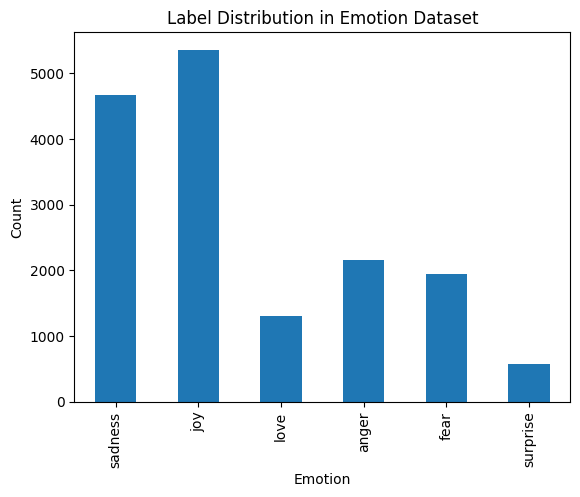

In [7]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset("emotion")

print("Dataset features:")
print(dataset["train"].features)

print("\nSample rows:")
print(dataset["train"][0:3])

df = pd.DataFrame(dataset["train"])
label_counts = df["label"].value_counts().sort_index()

label_names = dataset["train"].features["label"].names
label_counts.index = [label_names[i] for i in label_counts.index]

label_counts.plot(kind="bar", title="Label Distribution in Emotion Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


#### Q2.0: Utilities (5 pts)

a. Write a function named `get_stratified_sample` that takes the following parameters:
- `dataset`: The input dataset (a Hugging Face Dataset object).
- `n_samples`: The desired number of samples in the stratified sample.
- `random_state`: An integer for reproducible sampling (default to 42).

The function should return a stratified sample of the dataset, maintaining the original class proportions.

Keep in mind that we need ```DS_TRAINING_SIZE``` samples for training and ```DS_TEST_SIZE``` samples for testing. If you are going to use the validation set, ```DS_VALIDATION_SIZE``` is needed for this. You may change these if you see fit but with these numbers, you can get a good enough result in an acceptable time.

***NOTE:*** Make sure your function shuffles the final dataset.

In [8]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

def get_stratified_sample(dataset, n_samples, random_state=42):
  if len(dataset) < n_samples:
    return dataset
  df = dataset.to_pandas()

  df_sample, _ = train_test_split(
      df,
      train_size=n_samples,
      stratify=df["label"],
      random_state=random_state,
      shuffle=True
  )

  df_sample = df_sample.sample(frac=1, random_state=random_state).reset_index(drop=True)

  return Dataset.from_pandas(df_sample)

b. Use your function to create train,test and (validation) sets. Compare the distribution of labels with the full dataset to make sure it's working correctly. Printing or plotting the distributions is enough.

In [9]:
train_set = get_stratified_sample(dataset["train"], n_samples=1500)
test_set = get_stratified_sample(dataset["test"], n_samples=100)
val_set = get_stratified_sample(dataset["validation"], n_samples=50)

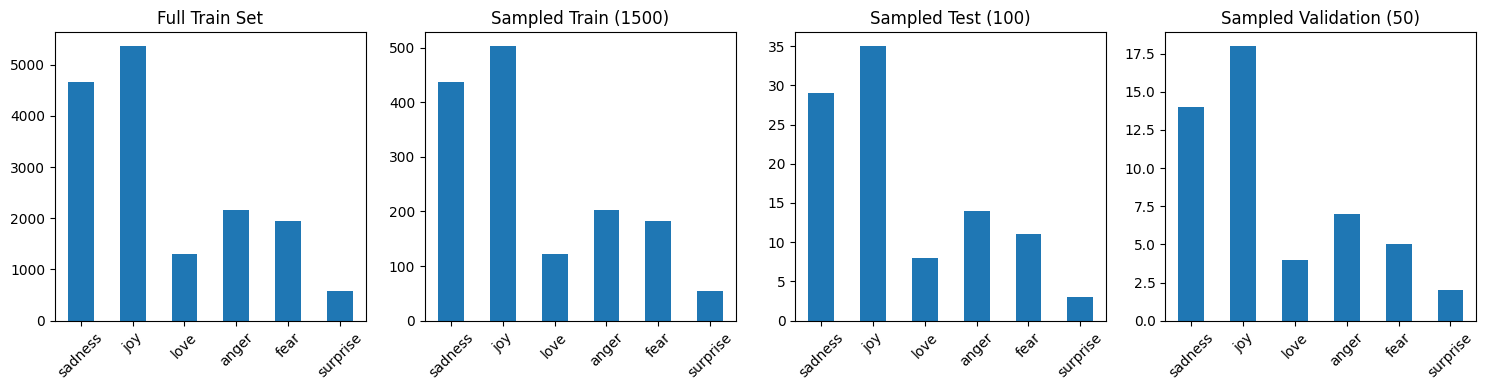

In [10]:
def get_label_distribution(ds, label_names):
    df = ds.to_pandas()
    label_counts = df["label"].value_counts().sort_index()
    label_counts.index = [label_names[i] for i in label_counts.index]
    return label_counts

label_names = dataset["train"].features["label"].names

full_train_dist = get_label_distribution(dataset["train"], label_names)
sampled_train_dist = get_label_distribution(train_set, label_names)
sampled_test_dist = get_label_distribution(test_set, label_names)
sampled_val_dist = get_label_distribution(val_set, label_names)

plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
full_train_dist.plot(kind="bar", title="Full Train Set")
plt.xticks(rotation=45)

plt.subplot(1, 4, 2)
sampled_train_dist.plot(kind="bar", title="Sampled Train (1500)")
plt.xticks(rotation=45)

plt.subplot(1, 4, 3)
sampled_test_dist.plot(kind="bar", title="Sampled Test (100)")
plt.xticks(rotation=45)

plt.subplot(1, 4, 4)
sampled_val_dist.plot(kind="bar", title="Sampled Validation (50)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Q2.1: Preparing Data for Fine-Tuning (10 pts)

a. Let's get the emotion dataset ready for LoRA fine-tuning. Here's what you need to do:

1.  **Format the Data**: Turn each data entry into a conversation like this:
    *   A system instruction that tells the model what to do (analyze emotions)```*```.
    *   A user query that gives the model the text to analyze.
    *   An assistant response that provides the correct emotion label (in natural language, naturally!)
2.  **Tokenize and Label**:
    *   Tokenize the formatted conversation.
    *   Prepare labels for training, make sure to mask the instruction part of the data ```**```.

Also, write a verification function that in a human readable format:

*   Prints the complete training input sequence after tokenization for a given data entry.
*   Shows the labels, indicating which tokens are being predicted.
*   Checks if the assistant header is correctly handled by finding its position in the text and printing the subsequent text.

```*TIP:``` It is a good practice to make your system instruction as concise as possible. For example in this task, you should tell the LLM explicitly that what are the valid labels.

In [ ]:
train_set[0]

{'text': 'im sure she left feeling angry and unhappy but she also caused members of staff to feel angry aggressive and upset hurt as her final say was a personal attack to say we were awful individuals with bad attitudes',
 'label': 3}

In [11]:
label_names = dataset['train'].features["label"].names

system_prompt = "You are an emotion classifier. Possible emotions: " + ", ".join(label_names) + "."

def format_example(example):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": example["text"]},
        {"role": "assistant", "content": label_names[example["label"]]}
    ]

train_formatted = [format_example(ex) for ex in train_set]


In [ ]:
train_formatted[0]

[{'role': 'system',
  'content': 'You are an emotion classifier. Possible emotions: sadness, joy, love, anger, fear, surprise.'},
 {'role': 'user',
  'content': 'im sure she left feeling angry and unhappy but she also caused members of staff to feel angry aggressive and upset hurt as her final say was a personal attack to say we were awful individuals with bad attitudes'},
 {'role': 'assistant', 'content': 'anger'}]

In [12]:
def tokenize_and_mask(example, tokenizer):
    tokenizer.pad_token = tokenizer.eos_token

    prompt = tokenizer.apply_chat_template(example, chat_template=tokenizer.chat_template, tokenize=False, add_generation_prompt=True)

    assistant_start = prompt.find("<|start_header_id|>assistant<|end_header_id|>")

    tokenized  = tokenizer(prompt, return_tensors="pt", padding="max_length", truncation=True, max_length=256)
    input_ids = tokenized ["input_ids"][0]
    attention_mask  = tokenized ["attention_mask"][0]

    labels = input_ids.clone()

    tokenized_up_to_start = tokenizer(prompt[:assistant_start], return_tensors="pt", truncation=True, padding=False)

    start_index = tokenized_up_to_start["input_ids"].shape[-1]

    labels[:start_index] = -100

    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "labels": labels
    }

In [ ]:
sample_encoded = tokenize_and_mask(train_formatted[0], INSTRUCT_MODEL_tokenizer)
sample_encoded

{'input_ids': tensor([128000, 128000, 128006,   9125, 128007,    271,  38766,   1303,  33025,
           2696,     25,   6790,    220,   2366,     18,    198,  15724,   2696,
             25,    220,    966,   2947,    220,   2366,     20,    271,   2675,
            527,    459,  20356,  34465,     13,  37207,  21958,     25,  51978,
             11,  16267,     11,   3021,     11,  19788,     11,   8850,     11,
          13051,     13, 128009, 128006,    882, 128007,    271,    318,   2771,
           1364,   2163,   8430,  19021,    323,  43251,    719,   1364,   1101,
           9057,   3697,    315,   5687,    311,   2733,  19021,  19738,    323,
          23268,  13194,    439,   1077,   1620,   2019,    574,    264,   4443,
           3440,    311,   2019,    584,   1051,  25629,   7931,    449,   3958,
          33726, 128009, 128006,  78191, 128007,    271,   4091, 128009, 128006,
          78191, 128007,    271, 128009, 128009, 128009, 128009, 128009, 128009,
         128009

In [13]:
def verify_sample(example, tokenizer):
    prompt = tokenizer.apply_chat_template(example, tokenize=False, add_generation_prompt=True)

    print("📝 Prompt:")
    print(prompt)
    print("\n" + "=" * 80)

    encoded = tokenize_and_mask(example, tokenizer)
    input_ids = encoded["input_ids"]
    labels = encoded["labels"]
    attention_mask = encoded["attention_mask"]

    decoded_input = tokenizer.decode(input_ids, skip_special_tokens=False)
    print("🔢 Decoded Input IDs:")
    print(decoded_input)
    print("\n" + "=" * 80)

    visible_labels = [
        tokenizer.decode([token]) if label != -100 else "[MASK]"
        for token, label in zip(input_ids, labels)
    ]
    print("🎯 Labels (tokens to be predicted shown, others masked):")
    print(" ".join(visible_labels))
    print("\n" + "=" * 80)

    print("🧠 Attention Mask:")
    print(attention_mask.tolist())
    print("\n" + "=" * 80)

    assistant_start_tag = "<|start_header_id|>assistant<|end_header_id|>"
    if assistant_start_tag in prompt:
        assistant_index = prompt.index(assistant_start_tag)
        assistant_response = prompt[assistant_index + len(assistant_start_tag):].strip()
        print("🧠 Assistant Response Content After Header:")
        print(assistant_response)
    else:
        print("❌ Assistant header not found in prompt!")


b. When preparing the data, experiment with the tokenizer parameters, namely `truncation`, `padding` and `max_length`. In a ```concise``` manner, explain what each one of them does and what is a good value and why.

Truncation: This parameter ensures that if the input text exceeds the max_length, the extra tokens are cut off. Setting truncation=True is essential to prevent input sequences from exceeding the model’s token limit (e.g., 512 tokens), which would otherwise cause errors.

Padding: Padding makes all input sequences the same length by adding extra tokens. When padding=False, sequence lengths vary. For batch training, it's best to use padding="max_length" or "longest" to ensure uniform input sizes across a batch.

max_length: This defines the maximum number of tokens the tokenizer should return. A value like max_length=512 is a good default, as most transformer models (like LLaMA or BERT) are trained with this limit. Using a larger value can increase memory usage, while a smaller value might cut off important parts of the input.

📌 In our code:


`tokenizer(prompt, truncation=True, padding=False, max_length=512)`

is suitable for single examples. For batch training, switching to padding="max_length" would ensure consistency across inputs.

c. ```**```When preparing the data, mask the instruction part of the data (set labels to -100 for the instruction tokens) before starting the training. Why is this a good idea?

>We don't want the model to learn to "predict" the system and user instructions — those are inputs, not outputs.

During fine-tuning, the model learns by trying to predict the labels. If we include system or user tokens in the labels, the model would waste capacity trying to reproduce those fixed instructions instead of focusing on learning how to generate the assistant’s response, which is the real objective.

So by masking with -100, we ensure that only the assistant's response contributes to the loss function — keeping the training focused, efficient, and meaningful.

d. Run your verification function on the first sample of your training dataset to see everything is in order.

In [ ]:
verify_sample(train_formatted[0], INSTRUCT_MODEL_tokenizer)

📝 Prompt:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 30 Mar 2025

You are an emotion classifier. Possible emotions: sadness, joy, love, anger, fear, surprise.<|eot_id|><|start_header_id|>user<|end_header_id|>

im sure she left feeling angry and unhappy but she also caused members of staff to feel angry aggressive and upset hurt as her final say was a personal attack to say we were awful individuals with bad attitudes<|eot_id|><|start_header_id|>assistant<|end_header_id|>

anger<|eot_id|><|start_header_id|>assistant<|end_header_id|>



🔢 Decoded Input IDs:
<|begin_of_text|><|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 30 Mar 2025

You are an emotion classifier. Possible emotions: sadness, joy, love, anger, fear, surprise.<|eot_id|><|start_header_id|>user<|end_header_id|>

im sure she left feeling angry and unhappy but she also caused members of staff to fe

### B. Fine-tune using LoRa (30 pts)

In [14]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )


#### Q2.2: Experimenting with LoRA Configuration Parameters (3 pts)

In this section, you may explore the effect of different LoRA configuration parameters on the trainable parameter count:

1. Try different rank values (`r`) - experiment with values like 8, 16, 32, and 64
    - Higher rank allows for more expressive power but increases parameter count
    
2. Adjust the scaling factor (`lora_alpha`) - typically set to 2x the rank
    - This affects the magnitude of updates during training
    
3. Modify target modules - test different combinations like:
    - Only attention modules: `["q_proj", "v_proj"]`
    - All attention modules: `["q_proj", "k_proj", "v_proj", "o_proj"]`
    - Including feed-forward: `["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]`
    
4. Vary dropout rates (`lora_dropout`) - test values like 0.0, 0.05, 0.1
    - Higher dropout can help with regularization

You may use the `print_trainable_parameters()` function to observe how each change affects the number of trainable parameters.

(We are not requiring you to print and explain everything, these are some values to help you out)


In [15]:
from transformers import AutoModelForCausalLM, AutoTokenizer

base_model = AutoModelForCausalLM.from_pretrained(BASE_MODEL, device_map=DEVICE)
base_tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
base_tokenizer.pad_token = base_tokenizer.eos_token


instruct_model = AutoModelForCausalLM.from_pretrained(INSTRUCT_MODEL, device_map=DEVICE)
instruct_tokenizer = AutoTokenizer.from_pretrained(INSTRUCT_MODEL)
instruct_tokenizer.pad_token = instruct_tokenizer.eos_token


config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [16]:
def test_lora_configurations(base_model, configs):
    def lora_config(r, lora_alpha, target_modules, lora_dropout):
        return LoraConfig(
            r=r,
            lora_alpha=lora_alpha,
            target_modules=target_modules,
            lora_dropout=lora_dropout,
            bias="none",
            task_type=TaskType.CAUSAL_LM
        )

    for r, alpha, dropout, modules in configs:
        config = lora_config(r=r, lora_alpha=alpha, target_modules=modules, lora_dropout=dropout)
        lora_model = get_peft_model(base_model, config)
        print(f"\nConfiguration: r={r}, alpha={alpha}, dropout={dropout}, modules={modules}")
        print_trainable_parameters(lora_model)

In [17]:
configs = [
    (8, 16, 0.1, ["q_proj", "v_proj"]),
    (16, 32, 0.1, ["q_proj", "k_proj", "v_proj", "o_proj"]),
    (32, 64, 0.1, ["q_proj", "k_proj", "v_proj", "o_proj"]),
    (16, 32, 0.1, ["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj"]),
    (32, 64, 0.1, ["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj"]),
    (16, 32, 0.05, ["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]),
    (32, 64, 0.05, ["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]),
]

test_lora_configurations(base_model, configs)


Configuration: r=8, alpha=16, dropout=0.1, modules=['q_proj', 'v_proj']
trainable params: 851968 || all params: 1236666368 || trainable%: 0.06889230774326355

Configuration: r=16, alpha=32, dropout=0.1, modules=['q_proj', 'k_proj', 'v_proj', 'o_proj']
trainable params: 3407872 || all params: 1239222272 || trainable%: 0.2750008676409586

Configuration: r=32, alpha=64, dropout=0.1, modules=['q_proj', 'k_proj', 'v_proj', 'o_proj']
trainable params: 6815744 || all params: 1242630144 || trainable%: 0.5484933737451648

Configuration: r=16, alpha=32, dropout=0.1, modules=['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj']
trainable params: 6029312 || all params: 1241843712 || trainable%: 0.48551294673705286

Configuration: r=32, alpha=64, dropout=0.1, modules=['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj']
trainable params: 12058624 || all params: 1247873024 || trainable%: 0.9663342157478997

Configuration: r=16, alpha=32, dropout=0.05, modules=['q_proj', 'k_proj', 'v_proj', 'o_proj'

In [18]:
### Your Answer Here (Final Chosen Lora Config + Output of trainable parameters function on that)
r, lora_alpha, lora_dropout, target_modules = configs[5]

lora_cfg = LoraConfig(
    r=r,
    lora_alpha=lora_alpha,
    target_modules=target_modules,
    lora_dropout=lora_dropout,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)

lora_model = get_peft_model(base_model, lora_cfg)

a. Find a configuration that provides a good balance between parameter efficiency and model expressiveness. Explain your reasons in a concise manner.

✅ Configuration:
r = 16, alpha = 32, dropout = 0.05

modules = ['q_proj', 'k_proj', 'v_proj', 'o_proj', 'gate_proj', 'up_proj', 'down_proj']

Trainable %: 0.90% (Lowest among all)

✅ Reasons:
This configuration covers both attention and feed-forward layers, enabling strong expressiveness.

It uses a moderate rank (16), reducing parameter size compared to r=32.

It has the lowest percentage of trainable parameters (0.90%), making it efficient for fine-tuning on limited compute.

A smaller dropout (0.05) gives better regularization without hurting performance drastically.

✅ Conclusion: This setup offers an excellent trade-off: it touches all impactful modules while keeping the number of trainable parameters low — ideal for efficient yet expressive fine-tuning.

#### Q2.3: Training Callbacks and Early Stopping (10 pts)


**Understanding Training Callbacks**

Generally speaking, in deep learning, callbacks are functions that can be applied at various stages of training
(start/end of training, epoch, or batch) to modify the training process. They're powerful
tools that allow you to:

- Monitor training metrics in real-time
- Add custom logging
- Save model checkpoints
- Implement early stopping
- Adjust learning rates dynamically

**Early Stopping**

Early stopping is a regularization technique that prevents overfitting by stopping training
when a monitored metric stops improving. Benefits include:

- Reduced training time
- Better generalization
- Prevention of overfitting

**Your Task**

a. Implement a custom callback class that:
1. Tracks the best loss value during training
2. Calculates perplexity in steps
3. Adds perplexity to the training logs
4. Implements early stopping if the loss doesn't improve for several steps (This is called patience)
5. (In your final project it is a good idea to use the big enough validation set to better monitor the training process. Given the time constraints for this assignment, we are not requiring you to do that.)

***NOTE:*** You should inherit from the TrainerCallback class implemented in transformers


In [19]:
from transformers import TrainerCallback, TrainerControl, TrainerState, Trainer
from transformers.trainer_utils import EvalPrediction
from transformers import TrainingArguments
import math

class CustomEarlyStoppingCallback(TrainerCallback):
    def __init__(self, patience=5):
        self.patience = patience
        self.best_loss = float("inf")
        self.counter = 0

    def on_log(self, args: TrainingArguments, state: TrainerState, control: TrainerControl, logs=None, **kwargs):
        if logs is None or "loss" not in logs:
            return

        current_loss = logs["loss"]
        current_ppl = math.exp(current_loss)

        print(f"[🔍 LOG] Step {state.global_step} | Loss: {current_loss:.4f} | Perplexity: {current_ppl:.2f}")

        logs["perplexity"] = current_ppl

        if current_loss < self.best_loss:
            self.best_loss = current_loss
            self.counter = 0
        else:
            self.counter += 1
            print(f"[⚠️ EARLY STOPPING] No improvement for {self.counter} steps.")
            if self.counter >= self.patience:
                print("[🛑 EARLY STOPPING ACTIVATED]")
                control.should_training_stop = True


In [20]:
from transformers import DataCollatorForLanguageModeling

train_formatted = [format_example(ex) for ex in train_set]
val_formatted = [format_example(ex) for ex in val_set]

train_tokenized = [tokenize_and_mask(ex, instruct_tokenizer) for ex in train_formatted]
val_tokenized = [tokenize_and_mask(ex, instruct_tokenizer) for ex in val_formatted]

train_dataset = Dataset.from_list(train_tokenized)
eval_dataset = Dataset.from_list(val_tokenized)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=instruct_tokenizer,
    mlm=False  # چون causal LM هست، نباید masked LM باشه
)



#### Q2.4: TrainingArgs (7 pts)

b. Explain the purpose of a minimum of 5 of the following TrainingArguments parameters in ```at most two sentences.```
For each parameter, suggest a good value for our emotion classification problem,
considering we are using a Llama-3.2-1B model and training in a Colab/Kaggle environment.
Explain why you chose that value.

1.  `lr_scheduler_type`
2.  `per_device_train_batch_size`
3.  `gradient_accumulation_steps`
4.  `learning_rate`
5.  `weight_decay`
6.  `bf16`
7.  `max_grad_norm`
8.  `warmup_ratio`
9.  `group_by_length`

1. lr_scheduler_type

Explanation: Determines how the learning rate changes during training (e.g., constant, linear decay, cosine).

Recommended value: "linear"

Why: Linear decay works well for small- to medium-sized training runs with steady convergence.

2. per_device_train_batch_size

Explanation: Number of samples processed per device (GPU) in one training step.

Recommended value: 4 (or 2 if limited memory)

Why: LLaMA-3.2B is a large model; smaller batch size prevents out-of-memory errors on limited GPUs like Colab’s T4.

3. gradient_accumulation_steps

Explanation: Number of steps to accumulate gradients before performing a backward pass.

Recommended value: 4

Why: Helps simulate larger batch sizes and stabilize training without increasing GPU memory usage.

4. learning_rate

Explanation: Controls how much model weights are updated during each training step.

Recommended value: 2e-5

Why: A small learning rate is safer for large models and helps avoid training instability.

5. weight_decay

Explanation: Regularization technique to prevent overfitting by reducing weights.

Recommended value: 0.01

Why: A standard value that works well for most NLP models to enhance generalization.

6. bf16

Explanation: Enables training with bfloat16 precision for faster computation and lower memory use.

Recommended value: False (or True if you’re using an A100 GPU)

Why: Colab/Kaggle usually provides T4/V100 GPUs, which don’t support bf16; it should be off by default.

7. max_grad_norm

Explanation: Clips the gradient norm to avoid exploding gradients.

Recommended value: 1.0

Why: A widely used default value to stabilize training.

8. warmup_ratio

Explanation: Fraction of total training steps during which learning rate gradually increases.

Recommended value: 0.1

Why: Helps the model start learning smoothly and prevents early training shocks.

9. group_by_length

Explanation: Groups sequences of similar lengths in a batch to reduce padding and improve training efficiency.

Recommended value: True

Why: Optimizes performance and training speed, especially for variable-length text data.

b. Define your trainings args

In [21]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./emotion_lora_results",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
    weight_decay=0.01,
    bf16=True,
    logging_steps=10,
    save_strategy="epoch",
    evaluation_strategy="no",
    save_total_limit=1,
    max_grad_norm=1.0,
    report_to="none",
    push_to_hub=False,
    group_by_length=True,
    load_best_model_at_end=False
)


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


#### Q2.5: Memory usage (8 points)

Now, we want to determine the memory required to **load and train** the LLM in different fine-tuning scenarios.  

- **Full Fine-Tuning:** Calculate the total memory needed when updating all model parameters.  
- **LoRA Fine-Tuning:** Calculate the memory needed based on your LoRA configuration.  
- Use your current settings for the calculations.  
- Refer to [this resource](https://blog.eleuther.ai/transformer-math/) for guidance.

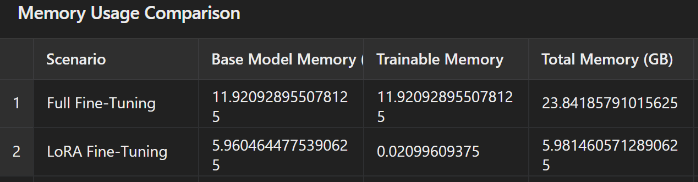

#### Q2.6: Training the model (2 pts)

Train and save the model. Your training should take at most 10 minutes on a Google colab notebook.

***PRO-TIP:*** If you want to go a step further on a good training task, you may research and use model checkpointing and monitoring tools (like weights and biases and tensorboard) But it's not required here.

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
from transformers import Trainer, DataCollatorForLanguageModeling
from peft import get_peft_model

peft_model = get_peft_model(base_model, lora_cfg)

data_collator = DataCollatorForLanguageModeling(tokenizer=instruct_tokenizer, mlm=False)

SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/LLM/model"
os.makedirs(SAVE_DIR, exist_ok=True)

resume_checkpoint = SAVE_DIR if os.path.exists(os.path.join(SAVE_DIR, "trainer_state.json")) else None
if resume_checkpoint:
    print(f"🔄 Resuming from checkpoint at {resume_checkpoint}")
else:
    print("🚀 Starting training from scratch")

trainer = Trainer(
    model=peft_model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=instruct_tokenizer,
    data_collator=data_collator,
    callbacks=[CustomEarlyStoppingCallback(patience=5)]
)


<ipython-input-23-716968584345>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


🚀 Starting training from scratch


In [ ]:
trainer.train(resume_from_checkpoint=resume_checkpoint)

peft_model.save_pretrained(SAVE_DIR)
INSTRUCT_MODEL_tokenizer.save_pretrained(SAVE_DIR)

print("✅ مدل LoRA و توکنایزر در Google Drive ذخیره شدند.")

In [ ]:
import os

SAVE_DIR = "/content/drive/MyDrive/Colab Notebooks/LLM/model"
checkpoints = [d for d in os.listdir(SAVE_DIR) if d.startswith("checkpoint-")]
if checkpoints:
    latest_checkpoint = max(checkpoints, key=lambda x: int(x.split("-")[-1]))
    resume_checkpoint = os.path.join(SAVE_DIR, latest_checkpoint)
    print(f"🔄 Resuming from checkpoint: {resume_checkpoint}")
else:
    resume_checkpoint = None
    print("🚀 No previous checkpoint found. Training will start from scratch.")


🔄 Resuming from checkpoint: /content/drive/MyDrive/Colab Notebooks/LLM/model/checkpoint-279


In [ ]:
trainer.train(resume_from_checkpoint="/content/drive/MyDrive/Colab Notebooks/LLM/model/checkpoint-279")

Step,Training Loss


TrainOutput(global_step=279, training_loss=0.0, metrics={'train_runtime': 0.0123, 'train_samples_per_second': 366350.311, 'train_steps_per_second': 22713.719, 'total_flos': 6846637179666432.0, 'train_loss': 0.0, 'epoch': 2.992})

In [ ]:
peft_model.save_pretrained(SAVE_DIR)
INSTRUCT_MODEL_tokenizer.save_pretrained(SAVE_DIR)

('/content/drive/MyDrive/Colab Notebooks/LLM/model/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/LLM/model/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/LLM/model/tokenizer.json')

### C. Some other PEFT methods (6 pts)

#### Q2.7: IA3 method (2 points)

IA3 ([Liu et al., 2022](https://openreview.net/pdf?id=rBCvMG-JsPd)) is another PEFT method. Briefly explain how it works.

IA³ (Infused Adapter by Attention) is a parameter-efficient fine-tuning method that introduces small learnable scaling vectors into the attention and feedforward layers of a transformer. Instead of updating the full model, IA³ fine-tunes only these vectors which modulate the outputs of key, value, and feedforward computations. This reduces the number of trainable parameters significantly while maintaining performance.

#### Q2.8: Soft Prompt methods (4 points)

Instead of fine-tuning all model parameters, prompting uses additional input text to guide a frozen model toward a specific task.  

There are two types of prompts [(Hugging Face, PEFT)](https://huggingface.co/docs/peft/en/conceptual_guides/prompting):  
- **Hard prompts**: Manually crafted text prompts using discrete tokens, but designing them is labor-intensive.  
- **Soft prompts**: Learnable tensors concatenated with input embeddings and optimized for a dataset, but they are not human-readable.  

In this section, you will explore how soft prompts are implemented and fine-tuned using PEFT.


Briefly explain the following soft prompt methods and highlight their key differences:  
- **Prompt Tuning** [(Lester et al., 2021)](https://aclanthology.org/2021.emnlp-main.243.pdf)  
- **Prefix Tuning** [(Li & Liang, 2021)](https://aclanthology.org/2021.acl-long.353.pdf)  
- **P-Tuning** [(Liu et al., 2021)](https://arxiv.org/pdf/2103.10385)  

Prompt Tuning (Lester et al., 2021)

This method introduces a small number of learnable embeddings (soft prompts) that are prepended to the input text.
These embeddings are optimized during training, while the rest of the model remains frozen.
It’s simple and parameter-efficient but may lack expressive power for complex tasks.

Prefix Tuning (Li & Liang, 2021)

Rather than only adding learnable embeddings at the input level, Prefix Tuning prepends learnable vectors to the key and value matrices in each Transformer layer’s attention mechanism.
This allows the model to influence internal representations more directly, leading to greater expressiveness than Prompt Tuning, at the cost of slightly higher memory use.

P-Tuning (Liu et al., 2021)

P-Tuning generates soft prompts using a neural network, typically an LSTM or MLP, making the prompt generation dynamic and more expressive.
This method is especially effective in low-resource or few-shot learning settings.
It’s more complex than Prompt and Prefix Tuning but can yield better performance.

🔑 Key Differences:

Prompt Tuning: Adds fixed learnable embeddings at input; light and simple.

Prefix Tuning: Injects learnable vectors into the attention mechanism across layers.

P-Tuning: Uses a neural network to dynamically generate prompts; more flexible.

### D. Evaluate and Comparison (24 pts)

#### Q2.9: Generating Output from Models (10 pts)

Generate the output of models on the task of emotion detection using:

- LoRa fine-tuned Model by you
- Instruction tuned model by Meta
- Base model by Meta

You may use ```Regex``` or simply looking for label names in model outputs to do obtain the classification repots. Looking at the results generated by models can help you greatly to find the best way to parse the output.

***NOTE:*** Your fine-tuned model MUST outperform the base model, but outperforming the instruction tuned model is optional and has extra points. (5 pts)

In [24]:
from peft import PeftModelForCausalLM

# بارگذاری مدل LoRA فاین‌تیون شده
peft_model = PeftModelForCausalLM.from_pretrained(
    AutoModelForCausalLM.from_pretrained(BASE_MODEL, device_map=DEVICE),
    "/content/drive/MyDrive/Colab Notebooks/LLM/model"
)
peft_tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Colab Notebooks/LLM/model")

In [25]:
import re

emotion_labels = ["sadness", "joy", "love", "anger", "fear", "surprise"]

def generate_response(model, tokenizer, prompt, **generation_kwargs):

  gen_config = model.generation_config
  default_generation_kwargs = {
        "do_sample": gen_config.do_sample,
        "top_p": gen_config.top_p,
        "temperature": gen_config.temperature
}

  generation_kwargs = {**default_generation_kwargs, **generation_kwargs}

  inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

  outputs = model.generate(
      input_ids=inputs["input_ids"],
      attention_mask=inputs["attention_mask"],
      **generation_kwargs
  )
  input_length = len(inputs["input_ids"][0])
  generated_text = tokenizer.decode(outputs[0][input_length:], skip_special_tokens=True)


  return generated_text


def generate_chat_response(model, tokenizer, messages, add_generation_prompt=True, **gen_kwargs):
    prompt = tokenizer.apply_chat_template(messages, tokenize=False)
    response = generate_response(model, tokenizer, prompt, **gen_kwargs)
    return response

def extract_emotions(text):
    emotions = re.findall("|".join(emotion_labels), text, flags=re.IGNORECASE)
    return [emotions[0]] if emotions else ["none"]

In [27]:
import random
import re

system_prompt = (
    "You are a helpful and precise emotion classifier. "
    "Given a user's text, classify it into exactly one of the following emotions: "
    "`sadness`, `joy`, `love`, `anger`, `fear`, or `surprise`. "
    "Respond with only the emotion label and nothing else."
)

sample_records = test_set.select(random.sample(range(len(test_set)), 5))

print("#" * 50)
print("Evaluating outputs on LoRa fine-tuned model:")
print("#" * 50)
for record in sample_records:
    text = record["text"]
    true_label = emotion_labels[record["label"]]
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"{text}"}
    ]

    messages = peft_tokenizer.apply_chat_template(messages, tokenize=False)
    response = generate_response(peft_model, peft_tokenizer, messages, max_new_tokens=10)

    detected = extract_emotions(response)
    print(f"Input: {text}")
    print(f"True Answer: {true_label}")
    print(f"Response: {response}")
    print(f"Detected emotions: {detected}")
    print("-" * 50)

print("#" * 50)
print("Evaluating outputs on Instruction tuned model:")
print("#" * 50)
for record in sample_records:
    text = record["text"]
    true_label = emotion_labels[record["label"]]
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"{text}"}
    ]

    response = generate_chat_response(instruct_model, instruct_tokenizer, messages, max_new_tokens=10)

    detected = extract_emotions(response)
    print(f"Input: {text}")
    print(f"True Answer: {true_label}")
    print(f"Response: {response}")
    print(f"Detected emotions: {detected}")
    print("-" * 50)

print("#" * 50)
print("Evaluating outputs on Base model:")
print("#" * 50)
for record in sample_records:
    text = record["text"]
    true_label = emotion_labels[record["label"]]

    few_shot_examples = train_set.select([0, 1, 2])
    few_shot_prompt = ""
    for i, ex in enumerate(few_shot_examples):
        label_str = emotion_labels[ex["label"]]
        few_shot_prompt += f"Example {i}: {ex['text']} => {label_str}\n"

    prompt_text = system_prompt + "\n" + few_shot_prompt + f"{text}"
    response = generate_response(base_model, base_tokenizer, prompt_text, max_new_tokens=10)
    detected = extract_emotions(response)

    print(f"Input: {text}")
    print(f"True Answer: {true_label}")
    print(f"Response: {response}")
    print(f"Detected emotions: {detected}")
    print("-" * 50)


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


##################################################
Evaluating outputs on LoRa fine-tuned model:
##################################################


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i kind of feel a little petty about this
True Answer: anger
Response: İTESİassistant

anger joy sadness love surprise anger
Detected emotions: ['anger']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i would do almost anything to have that feeling back and those days back they were carefree and wonderful and now everything in my life is just so complicated
True Answer: joy
Response:  ForCanBeConvertedToFassistant

joy joy joy joy joy joy
Detected emotions: ['joy']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i feel kinda bitchy and cranky i need to try and take a nap
True Answer: anger
Response: assistant

anger joy sadness love anger fear
Detected emotions: ['anger']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i feel defeated but others i feel refreshed
True Answer: sadness
Response: assistant

sadness joy love anger fear
Detected emotions: ['sadness']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i wish i could bottle her squeals of delight and take them out whenever im feeling grumpy
True Answer: anger
Response: assistant

anger joy sadness love surprise anger
Detected emotions: ['anger']
--------------------------------------------------
##################################################
Evaluating outputs on Instruction tuned model:
##################################################


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i kind of feel a little petty about this
True Answer: anger
Response: assistant

petty
Detected emotions: ['none']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i would do almost anything to have that feeling back and those days back they were carefree and wonderful and now everything in my life is just so complicated
True Answer: joy
Response: assistant

love
Detected emotions: ['love']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i feel kinda bitchy and cranky i need to try and take a nap
True Answer: anger
Response: assistant

cranky
Detected emotions: ['none']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i feel defeated but others i feel refreshed
True Answer: sadness
Response: assistant

sadness
Detected emotions: ['sadness']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i wish i could bottle her squeals of delight and take them out whenever im feeling grumpy
True Answer: anger
Response: assistant

joy
Detected emotions: ['joy']
--------------------------------------------------
##################################################
Evaluating outputs on Base model:
##################################################


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i kind of feel a little petty about this
True Answer: anger
Response:  because i feel like i m not the best at
Detected emotions: ['none']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i would do almost anything to have that feeling back and those days back they were carefree and wonderful and now everything in my life is just so complicated
True Answer: joy
Response:  and stressful and i just want to be able to
Detected emotions: ['none']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i feel kinda bitchy and cranky i need to try and take a nap
True Answer: anger
Response:  i feel like i need to take a nap i
Detected emotions: ['none']
--------------------------------------------------


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Input: i feel defeated but others i feel refreshed
True Answer: sadness
Response:  and energised => surprise
i feel like a
Detected emotions: ['surprise']
--------------------------------------------------
Input: i wish i could bottle her squeals of delight and take them out whenever im feeling grumpy
True Answer: anger
Response:  => joy
Example 3: im a bit
Detected emotions: ['joy']
--------------------------------------------------


In [28]:
test_set.features
# خروجی: ClassLabel(names=['sadness', 'joy', ...], num_classes=6)


{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


##################################################

Evaluation for fine-tuned model:


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

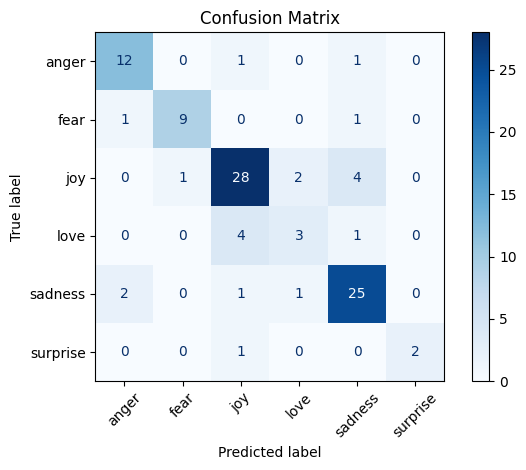

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


{'accuracy': 0.79, 'micro_f1': 0.79, 'true_labels': ['fear', 'fear', 'sadness', 'anger', 'love', 'anger', 'sadness', 'anger', 'sadness', 'fear', 'surprise', 'fear', 'fear', 'sadness', 'joy', 'anger', 'joy', 'joy', 'sadness', 'love', 'sadness', 'anger', 'love', 'joy', 'anger', 'love', 'sadness', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'anger', 'joy', 'anger', 'joy', 'fear', 'joy', 'joy', 'anger', 'fear', 'joy', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'joy', 'joy', 'fear', 'love', 'sadness', 'joy', 'sadness', 'anger', 'joy', 'love', 'joy', 'sadness', 'joy', 'love', 'joy', 'sadness', 'anger', 'sadness', 'joy', 'surprise', 'sadness', 'anger', 'sadness', 'sadness', 'joy', 'love', 'fear', 'joy', 'joy', 'joy', 'anger', 'anger', 'joy', 'fear', 'sadness', 'sadness', 'joy', 'sadness', 'fear', 'sadness', 'joy', 'joy', 'sadness', 'sadness', 'joy', 'sadness', 'joy', 'surprise', 'sadness'], 'pred_labels': ['fear', 'fear', 'sadness', 'anger', 'love', 'anger',

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

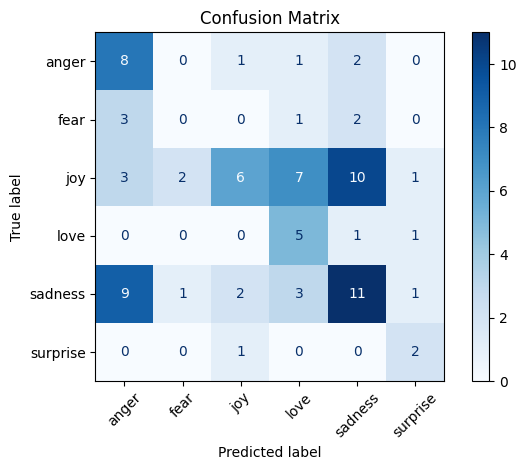

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


{'accuracy': 0.38095238095238093, 'micro_f1': 0.38095238095238093, 'true_labels': ['fear', 'sadness', 'love', 'anger', 'sadness', 'anger', 'sadness', 'fear', 'surprise', 'fear', 'sadness', 'joy', 'anger', 'joy', 'joy', 'sadness', 'love', 'sadness', 'anger', 'love', 'joy', 'love', 'sadness', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'anger', 'joy', 'anger', 'joy', 'fear', 'anger', 'joy', 'sadness', 'sadness', 'sadness', 'sadness', 'joy', 'joy', 'love', 'sadness', 'joy', 'sadness', 'anger', 'love', 'joy', 'sadness', 'joy', 'love', 'joy', 'sadness', 'anger', 'sadness', 'joy', 'surprise', 'sadness', 'anger', 'sadness', 'sadness', 'joy', 'joy', 'joy', 'joy', 'anger', 'anger', 'joy', 'fear', 'sadness', 'sadness', 'sadness', 'fear', 'sadness', 'joy', 'joy', 'sadness', 'sadness', 'sadness', 'joy', 'surprise', 'sadness'], 'pred_labels': ['anger', 'sadness', 'sadness', 'anger', 'joy', 'anger', 'anger', 'anger', 'surprise', 'love', 'anger', 'sadness', 'love', 'love', 'sadness', 'anger', 'l

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for

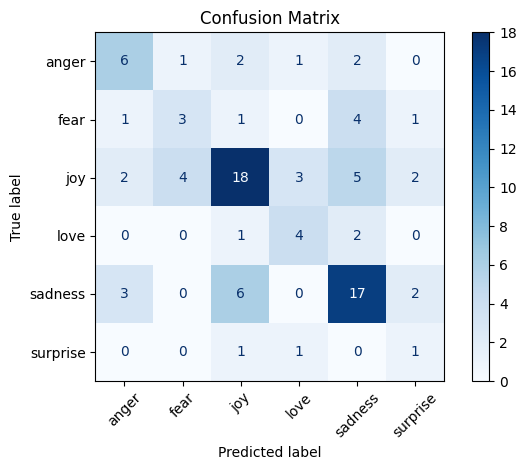

{'accuracy': 0.5212765957446809, 'micro_f1': 0.5212765957446809, 'true_labels': ['fear', 'fear', 'sadness', 'anger', 'love', 'anger', 'sadness', 'anger', 'sadness', 'fear', 'surprise', 'fear', 'fear', 'sadness', 'joy', 'anger', 'joy', 'joy', 'sadness', 'sadness', 'anger', 'love', 'joy', 'anger', 'love', 'sadness', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'anger', 'joy', 'joy', 'fear', 'joy', 'joy', 'fear', 'joy', 'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'joy', 'joy', 'love', 'sadness', 'joy', 'sadness', 'anger', 'joy', 'love', 'joy', 'sadness', 'joy', 'love', 'joy', 'sadness', 'anger', 'sadness', 'surprise', 'sadness', 'anger', 'sadness', 'sadness', 'joy', 'love', 'fear', 'joy', 'joy', 'joy', 'anger', 'anger', 'joy', 'fear', 'sadness', 'sadness', 'joy', 'sadness', 'fear', 'sadness', 'joy', 'joy', 'sadness', 'sadness', 'joy', 'sadness', 'joy', 'surprise', 'sadness'], 'pred_labels': ['surprise', 'sadness', 'sadness', 'fear', 'love', 'anger', 'joy', 'anger', '

In [30]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

system_prompt = (
    "You are a helpful and precise emotion classifier. "
    "Given a user's text, classify it into exactly one of the following emotions: "
    "`sadness`, `joy`, `love`, `anger`, `fear`, or `surprise`. "
    "Respond with only the emotion label and nothing else."
)

def show_confusion_matrix(true_labels, pred_labels):
    labels = sorted(list(set(true_labels + pred_labels)))
    cm = confusion_matrix(true_labels, pred_labels, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

def evaluate_model_metrics(model, tokenizer, dataset, base_model=False):
    true_labels = []
    pred_labels = []

    for example in dataset:
        true_emotion = emotion_labels[example["label"]]

        if base_model:
            # ساخت few-shot prompt
            few_shot_examples = train_set.select([0, 1, 2])
            few_shot_prompt = ""
            for i, ex in enumerate(few_shot_examples):
                label_str = emotion_labels[ex["label"]]
                few_shot_prompt += f"Example {i}: Analyze the emotion in the following text: {ex['text']} => {label_str}\n"

            prompt_text = system_prompt + "\n" + few_shot_prompt + f"Analyze the emotion in the following text: {example['text']}"
            response = generate_response(model, tokenizer, prompt_text, max_new_tokens=50)
        else:
            messages = [
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": f"{example['text']}"}
            ]
            response = generate_chat_response(model, tokenizer, messages, max_new_tokens=50)

        predicted_emotion = extract_emotions(response.strip())[0]

        if predicted_emotion and predicted_emotion != "none":
            true_labels.append(true_emotion.lower())
            pred_labels.append(predicted_emotion.lower())

    accuracy = accuracy_score(true_labels, pred_labels)
    micro_f1 = f1_score(true_labels, pred_labels, average='micro')

    show_confusion_matrix(true_labels, pred_labels)

    return {
        "accuracy": accuracy,
        "micro_f1": micro_f1,
        "true_labels": true_labels,
        "pred_labels": pred_labels
    }

print("#" * 50)
print("\nEvaluation for fine-tuned model:")
fine_tuned_metrics = evaluate_model_metrics(peft_model, peft_tokenizer, test_set)
print(fine_tuned_metrics)

print("#" * 50)
print("\nEvaluation for instruction-tuned model:")
instruct_metrics = evaluate_model_metrics(instruct_model, instruct_tokenizer, test_set)
print(instruct_metrics)

print("#" * 50)
print("\nEvaluation for base model:")
base_metrics = evaluate_model_metrics(base_model, base_tokenizer, test_set, base_model=True)
print(base_metrics)


#### Q2.10: Performance Comparison Visualization (4 pts)

Compare the Accuracy and Micro-F1 in a grouped bar chart. (4 pts)

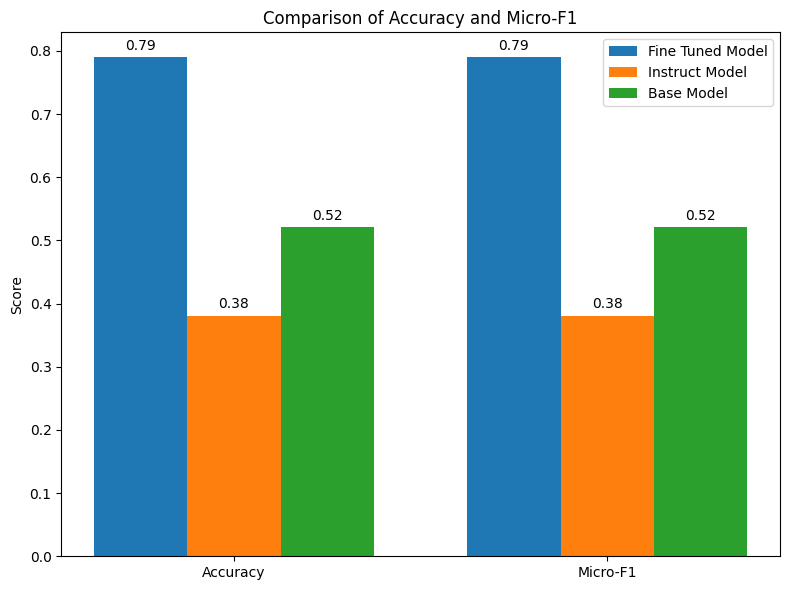

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists for the metrics names and their corresponding values for each model.
metrics_names = ['Accuracy', 'Micro-F1']
fine_tuned_values = [fine_tuned_metrics['accuracy'], fine_tuned_metrics['micro_f1']]
instruct_values = [instruct_metrics['accuracy'], instruct_metrics['micro_f1']]
base_values = [base_metrics['accuracy'], base_metrics['micro_f1']]

# Set the positions of the groups and the width of the bars
x = np.arange(len(metrics_names))
width = 0.25

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each model
bars_fine_tuned = ax.bar(x - width, fine_tuned_values, width, label='Fine Tuned Model')
bars_instruct = ax.bar(x, instruct_values, width, label='Instruct Model')
bars_base = ax.bar(x + width, base_values, width, label='Base Model')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and Micro-F1')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Function to add text labels above each bar
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # Offset text vertically by 3 points
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_fine_tuned)
autolabel(bars_instruct)
autolabel(bars_base)

fig.tight_layout()
plt.show()

In [32]:
import random

def show_random_predictions(metrics_result, dataset, num_samples=5):
    print("\n📊 Random Predictions:")
    indices = random.sample(range(len(metrics_result["true_labels"])), num_samples)

    for i in indices:
        true_label = metrics_result["true_labels"][i]
        pred_label = metrics_result["pred_labels"][i]
        input_text = dataset[i]["text"]

        print(f"\n🔹 Sample {i+1}:")
        print(f"📝 Text: {input_text}")
        print(f"✅ True Label: {true_label}")
        print(f"🤖 Predicted:  {pred_label}")
        print("✅✅✅ Correct!" if true_label == pred_label else "❌ Incorrect")


In [33]:
# قبلاً اجرا شده:
# fine_tuned_metrics = evaluate_model_metrics(peft_model, peft_tokenizer, test_set)
# instruct_metrics = evaluate_model_metrics(instruct_model, instruct_tokenizer, test_set)
# base_metrics = evaluate_model_metrics(base_model, base_tokenizer, test_set, base_model=True)

print("\n🔍 LoRA Fine-Tuned Model Samples:")
show_random_predictions(fine_tuned_metrics, test_set)

print("\n🔍 Instruction-Tuned Model Samples:")
show_random_predictions(instruct_metrics, test_set)

print("\n🔍 Base Model Samples:")
show_random_predictions(base_metrics, test_set)



🔍 LoRA Fine-Tuned Model Samples:

📊 Random Predictions:

🔹 Sample 32:
📝 Text: im feeling quite positive in what i want to achieve
✅ True Label: joy
🤖 Predicted:  joy
✅✅✅ Correct!

🔹 Sample 29:
📝 Text: i bought this doraemon backpack from a charity store i had every intention of putting it in my etsy store but i feel like its too cute to sell
✅ True Label: joy
🤖 Predicted:  joy
✅✅✅ Correct!

🔹 Sample 18:
📝 Text: i feel she said quickly i am so glad
✅ True Label: joy
🤖 Predicted:  joy
✅✅✅ Correct!

🔹 Sample 95:
📝 Text: i feel defeated but others i feel refreshed
✅ True Label: sadness
🤖 Predicted:  sadness
✅✅✅ Correct!

🔹 Sample 14:
📝 Text: i feel so dirty but after spending a day at the mk show me and a buddy decided we would get the two player starter between us luckily for us both i liked the everblight and he liked the circle maybe a tad to much so it all worked out well
✅ True Label: sadness
🤖 Predicted:  sadness
✅✅✅ Correct!

🔍 Instruction-Tuned Model Samples:

📊 Random Predictions

#### Q2.11: Analysis (10 pts)

Analyze the results and the reasons behind them.

```Your Answer Here```